In [367]:
from scipy.stats.qmc import LatinHypercube as LHSampler
from matplotlib import pyplot as plt
import numpy as np
from math import floor
import random as r
import copy

In [368]:
# setup sampler
LHS = LHSampler(d = 2)
ss1 = LHS.random(100)

In [369]:
# utilities
def concat(a: np.ndarray, b:np.ndarray):
    return np.concatenate((a, b), axis=0)

def inner_coords(point, N):
    timestep = 1/N
    # increases rounding error
    return [ point[j] * N - floor(point[j]/timestep) for j in range(len(point))]

def rpop(v: np.ndarray):
    rindex = r.randint(0, len(v) - 1)
    return v[rindex], np.delete(v, rindex, 0)


In [370]:
# 2D-only LHS plotter
def plotLHS(lhs: np.ndarray, grid = False, highlight = False):
    N, P = lhs.shape
    if P != 2:
        return
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.scatter(lhs[:, 0], lhs[:, 1], marker='o', c='r', s=2)
    if grid:
        for q in range(0, N):
            plt.axhline(y=q/N, color='black', linestyle='--', linewidth=0.3)
            plt.axvline(x=q/N, color='black', linestyle='--', linewidth=0.3)
    # floor(coord/interval_size) = interval_index (starting from zero)
    if highlight:
        timestep = 1/N
        for i in range(N):
            try:
                if lhs[i, 0] is None or lhs[i, 0] is None or np.isnan(lhs[i, 0]) or np.isnan(lhs[i, 1]):
                    continue
                qh = floor(lhs[i, 0]/timestep)
                qv = floor(lhs[i, 1]/timestep)
                plt.axvspan(qh/N, (qh+1)/N, facecolor='blue', alpha=0.15)
                plt.axhspan(qv/N, (qv+1)/N, facecolor='blue', alpha=0.15)
            except:
                continue

In [371]:
# auxiliary h variable that trace the displacement of each sample
def trace(PeLHS: np.ndarray):
    N, P = PeLHS.shape
    # for sake of clarity
    Q = N
    h = np.zeros((Q, N, P), dtype=int)
    for q in range(Q):
        for i in range(N):
            for j in range(P):
                if(PeLHS[i, j] is not None and not np.isnan(PeLHS[i, j]) and
                   q/Q <= PeLHS[i, j] <= (q+1)/Q):
                    h[q, i, j] = int(1)
    return h

# y auxiliary variable that counts the occurrences of samples in q-th interval 
# in the j-th dimension
# the verbose flag could be used to return a binary version of y (1 if there is 
# at least one sample in the interval, 0 otherwise)
def sudoku_identity(lhs: np.ndarray, verbose = True):
    h = trace(lhs)
    Q, _, P = h.shape
    y = np.zeros((Q, P), dtype=int)
    for q in range(Q):
        for j in range(P):
            s = np.sum(h[q, :, j])
            y[q, j] = s if verbose else (1 if s > 0 else 0)
    return y

# reduce y to a single value that represents the quality of the lhs
def lhs_grader(lhs: np.ndarray):
    y = sudoku_identity(lhs, verbose=False)
    # reducing y
    grade = np.min([np.sum(y[:, s]) for s in range(y.shape[1])])
    return grade

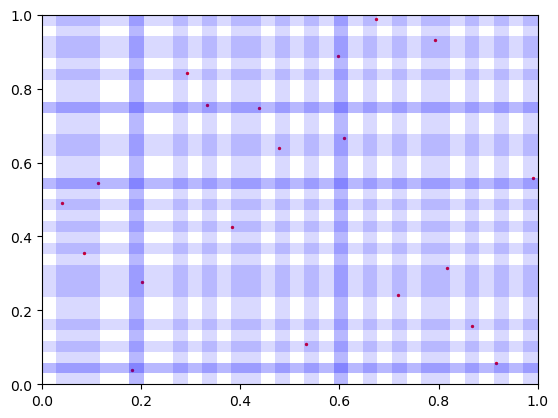

In [372]:
# empty-extend the LHS sample set NxP to a (N+M)xP set
def PartialeLHS(lhs: np.ndarray, M:int):
    _, P = lhs.shape
    PeLHS = np.concatenate((lhs, [[None for _ in range(P)] for _ in range(M)]))
    return PeLHS

# could be interesting which distribution the PeLHS grade has while varying M and N
N, M = 20, 14
ss2 = LHS.random(N)
pss2 = PartialeLHS(ss2, M)
plotLHS(pss2, grid=False, highlight=True)

LHS grade: 	 20
PeLHS grade: 	 17
eLHS grade: 	 31
Total Upgrade: 	 14  | Expected:  14


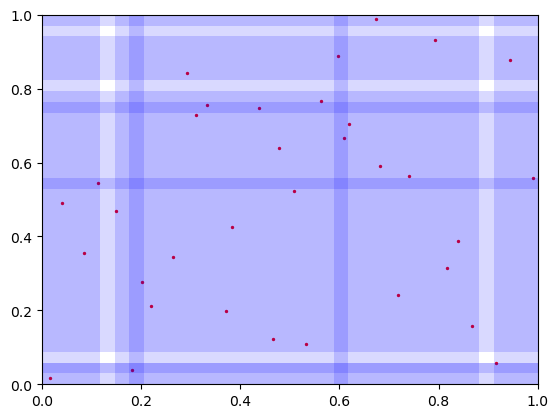

In [373]:

def sow(lhs: np.ndarray, M:int, scattering = False):
    PeLHS = PartialeLHS(lhs, M)
    eLHS = np.zeros((M, PeLHS.shape[1]))
    N, P = PeLHS.shape[0] - M, PeLHS.shape[1]
    sdk = sudoku_identity(PeLHS)

    # list of available dim-vacancies in PeLHS
    vacancies = [[i for i in range(N + M) if sdk[i, j] == 0] for j in range(P)]
    # TODO: fill the vacancies with proper LHS samples (two cases: perfect expansion and degenerate expansion)
    # sub-LHS: an LHS where its intervals are mapped against the PeLHS empty intervals
    expansion = LHS.random(M)
    timestep = 1/(N + M)
    # r.shuffle(expansion)
    for m in range(M):
        samplex = inner_coords(expansion[m], M)
        for j in range(P):
            q, vacancies[j] = rpop(vacancies[j])
            eLHS[m, j] = (q + samplex[j]) * timestep
    return eLHS

expansion = sow(ss2, M)
fss2 = concat(ss2, expansion)
plotLHS(fss2, False, True)
print("LHS grade: \t", lhs_grader(ss2))
print("PeLHS grade: \t", grpss2 := lhs_grader(pss2))
print("eLHS grade: \t", grfss2 := lhs_grader(fss2))
print("Total Upgrade: \t" , grfss2 - grpss2, " | Expected: ", M)

In [374]:
def scale_down(eLHS: np.ndarray, N: int, M: int):
    pass

def scale_up(eLHS: np.ndarray, N: int, M: int):
    pass

In [375]:
def eLHS(lhs: np.ndarray, M:int):
    N, P = lhs.shape
    if(lhs_grader(lhs) == N):
        raise ValueError("Parameter lhs must be a proper LHS sample")
    
    # returning container
    exp = {"F": None,
           "M": M,
           "Q": None,
           "N": N,
           "expansion": None, 
           "grade": eGrade }
    
    mExpansion = sow(lhs, M)
    eLHS = concat(lhs, mExpansion)
    eGrade = lhs_grader(eLHS)

    if(eGrade == N + M):
        exp["F"], exp["Q"] = M
        exp["expansion"] = mExpansion
        exp["grade"] = eGrade
    else:
        pass
    
    return exp

### TEST PLAYGROUND

Limited Sample Size Problem

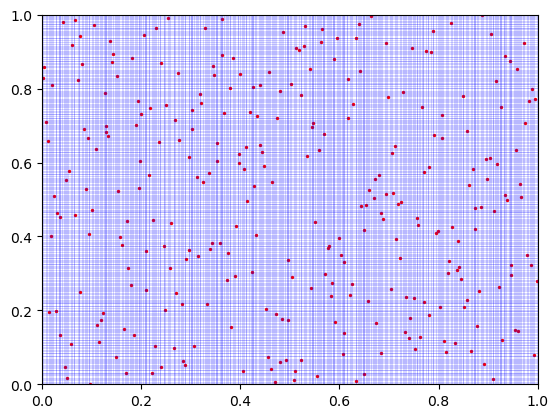

In [376]:
N3, M3 = 300, 98
ss3 = LHS.random(N3)
pss3 = PartialeLHS(ss3, M3)
plotLHS(pss3, False, True)
hbar3 = sudoku_identity(pss3)

### Karash-Kuhn-Tucker Solver for LSSP
E pensare che mi ha dato 20...

In [377]:
from scipy.optimize import minimize

# Approx Heaviside step function
def F(t, sharpness = 1000):
    return 0.5 * (1 + np.tanh(sharpness * t))

# Approx Heaviside step function
def H(x):
    return np.where(x < 0, 0, 1)

# f.o.
def objective(Q):
    return Q[0]

def constraint_eq(Q):
    pass 

def build_constraint_ineq(S: np.ndarray, q, j, alternative = 1, H = H):
    if alternative == 1:
        def constraint_ineq(unknowns):
            Q = unknowns[0]
            N = S.shape[0]
            if q/(N+Q)> 1: 
                return 0
            return -np.sum(H(S[:, j] - q/(N+Q)) * H((q+1)/(N+Q) - S[:, j]) - 1)
        return constraint_ineq
    elif alternative == 2:
        def constraint_ineq(unknowns):
            Q = unknowns[0]
            N = S.shape[0]
            return H(1 - q/(N+Q)) * -(np.sum(H(S[:, j] - q/(N+Q)) * H((q+1)/(N+Q) - S[:, j])) - 1) 
        return constraint_ineq
    

constraint_ineqs = []
for q in range(N3):
    for j in range(ss3.shape[1]):
        constraint_ineqs.append({'type': 'ineq', 'fun': build_constraint_ineq(ss3, q, j, 2)})

# constraint_ineqs.append(
#     {'type': 'ineq', 'fun': lambda Q: Q[0] - 1}
# )
# constraint_ineqs.append(
#     {'type': 'ineq', 'fun': lambda Q: N3 + Q[0]}
# )

initial_guess = [5]

result = minimize(
    objective,
    initial_guess,
    constraints = constraint_ineqs, 
    bounds = [(1, N3)], 
    method='SLSQP', 
    # tol=1e-6,
    options={
        # 'maxiter': 10000
        'disp': True
    }

)

print(result)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 1.0000000000002442
            Iterations: 11
            Function evaluations: 54
            Gradient evaluations: 7
 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: 1.0000000000002442
       x: [ 1.000e+00]
     nit: 11
     jac: [ 1.000e+00]
    nfev: 54
    njev: 7


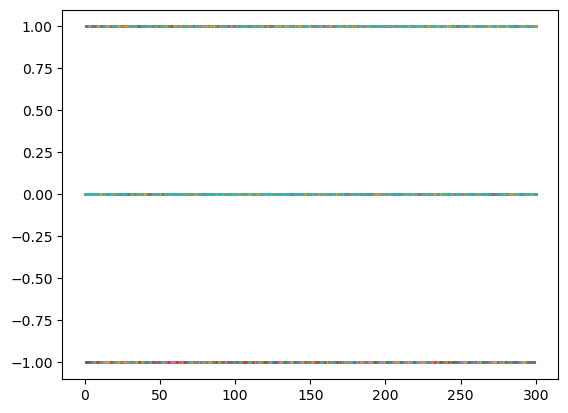

In [378]:
a, b = 0, N3
xs = np.linspace(a, b, N3+1)
for i in range(N3 * 2):
    ys = [constraint_ineqs[i]['fun']([x]) for x in xs]
    # plt.plot(xs, ys)
    plt.scatter(xs, ys, s=0.5)